# Grow Pittsburgh Food Gardens

### Introductions: 

Grow Pittsburgh is an organization that educates those who live in the city of Pittsburgh on how to care for and grow food despite living in an urban setting. They organize adult workshops, garden curriculum for schools and teacher training in order to teach others and donate the produce they grow to food distribution centers. This allows people to not only gain knowledge on how to grow their own food but help their community by providing safe and locally grown produce to those who may not have access to it. 

### How this relates to the metric of community:
The more of these gardens there are in a neighborhood, the more likely you will be surrounded by those who cared about you, hence strengthening the community.

### Let's get to the data!


In [1]:
## import the important stuffs!
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
import fpsnippets

gards = pd.read_csv("Datasets/growpittsburgh.csv")
gards.head(10)


,_id,urban_grower,grower_id,category,url,street_address,city,state,zip_code,country,latitude,longitude
0,1,Angora Gardens,584,sustainability-fund-site|other,https://www.growpittsburgh.org/directory/garde...,3 Muse Lane,White Oak,Pennsylvania,15131.0,US,40.404686,-79.862095
1,2,Everybody's Garden,586,sustainability-fund-site|other,https://www.growpittsburgh.org/directory/garde...,301 West Elizabeth Street,Pittsburgh,Pennsylvania,15207.0,US,40.406546,-79.945442
2,3,EvGard Extension,587,other,https://www.growpittsburgh.org/directory/garde...,NaN,Pittsburgh,Pennsylvania,15201.0,US,40.406377,-79.945559
3,4,Glen Hazel Communiuty Garden,588,other,https://www.growpittsburgh.org/directory/garde...,Johnston Avenue at Roselle Drive,Pittsburgh,Pennsylvania,15207.0,US,40.406040,-79.931253
4,5,Grow Pittsburgh,589,grow-pittsburgh-site,https://www.growpittsburgh.org/directory/garde...,6587 Hamilton Avenue #2W,Pittsburgh,Pennsylvania,15206.0,US,40.458481,-79.911381
5,6,Lawrenceville Organic Community Garden,590,other,https://www.growpittsburgh.org/directory/garde...,"Allegheny Cemetery, 4734 Butler Street",Pittsburgh,Pennsylvania,15201.0,US,40.477158,-79.956114
6,7,Masjid al Mu'min Madinah Garden,591,sustainability-fund-site|other,https://www.growpittsburgh.org/directory/garde...,159 Winslow Street,Pittsburgh,Pennsylvania,15206.0,US,40.464450,-79.911651
7,8,South Oakland Community Orchard,592,other,https://www.growpittsburgh.org/directory/garde...,3213 Parkview Avenue,Pittsburgh,Pennsylvania,15213.0,US,40.429834,-79.953578
8,9,Thelma Lovette YMCA Garden,593,other,https://www.growpittsburgh.org/directory/garde...,2114 Centre Avenue,Pittsburgh,Pennsylvania,15219.0,US,40.444369,-79.978126
9,10,Wiggins Garden,594,other,https://www.growpittsburgh.org/directory/garde...,Near 3026 Wiggins Street,Pittsburgh,Pennsylvania,15219.0,US,40.457618,-79.969499


This is what the data set looks like at the beginning! As it is not very useful the way it is, we have to use the gardens' latitudes and longitudes to find their neighborhoods and then count the number of times their neighborhoods occur over the dataset.

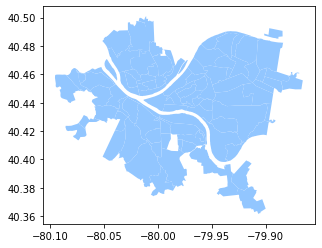

In [25]:
## might use this if I figure it out
neighborhoods = geopandas.read_file("Datasets/neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

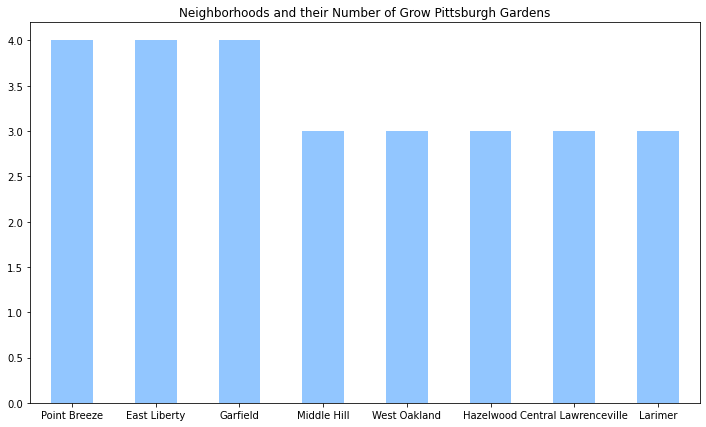

In [35]:
## try to use long and lat when I come back to this bc zip code is too broad
nlist = []
counts = []
for index, row in gards.iterrows():
    lat = row["latitude"]
    lon = row["longitude"]
    nlist.append(fpsnippets.geo_to_neighborhood(lat, lon))

latlongraph = pd.DataFrame(nlist, columns = ["neighborhood"])
neighbors = latlongraph["neighborhood"].value_counts().head(8)
neighbors.plot(kind = "bar", rot = 0, x = "neighborhood", y = "number of gardens", title = "Neighborhoods and their Number of Grow Pittsburgh Gardens", figsize = (12, 7))
##gardens_map = neighborhoods.merge(pd.concat(neighbors), how='left', left_on='hood', right_on='neighborhood')
##gardens_map.plot(column = "count")

## We have a three-way tie!

Point Breeze, East Liberty and Garfield have the most gardens, each with 4 gardens in their region.
